In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix

In [2]:
# Load  dataset
dataset = pd.read_csv('Battery_RUL.csv')

In [3]:
#reprocessing
features = dataset[['Discharge Time (s)', 'Decrement 3.6-3.4V (s)', 'Max. Voltage Dischar. (V)',
                    'Min. Voltage Charg. (V)', 'Time at 4.15V (s)', 'Time constant current (s)', 'Charging time (s)']]

In [4]:
threshold =69
# Create a binary column based on the threshold
dataset['RUL_binary'] = (dataset['RUL'] <= threshold).astype(int)
target = dataset['RUL_binary']
# Split the dataset into training and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)
# Create the KNN model
knn_model = KNeighborsClassifier(n_neighbors=9)  # You can adjust the number of neighbors (k)
knn_model.fit(X_train_scaled, y_train)
# Make predictions on the training set
y_pred_train = knn_model.predict(X_train_scaled)
# Evaluate the model on the training set
accuracy_train = accuracy_score(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
print(f'Training Accuracy: {accuracy_train}')
print(f'Training Mean Squared Error: {mse_train}')

Training Accuracy: 0.9860584218512898
Training Mean Squared Error: 0.013941578148710167


In [6]:
# Make predictions on the validation set
y_pred_valid = knn_model.predict(X_valid_scaled)
# Evaluate the model on the validation set
accuracy_valid = accuracy_score(y_valid, y_pred_valid)
mse_valid = mean_squared_error(y_valid, y_pred_valid)
print(f'Validation Accuracy: {accuracy_valid}')
print(f'Validation Mean Squared Error: {mse_valid}')

Validation Accuracy: 0.9805309734513274
Validation Mean Squared Error: 0.019469026548672566


In [7]:
# Confusion matrix for validation set
conf_matrix_valid = confusion_matrix(y_valid, y_pred_valid)
print('Validation Confusion Matrix:')
print(conf_matrix_valid)

Validation Confusion Matrix:
[[2096   27]
 [  17  120]]


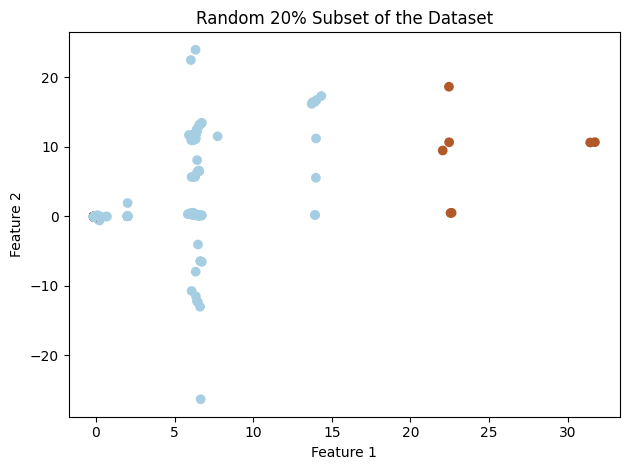

In [8]:
# Plot original features visualization
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.Paired)
plt.title('Random 20% Subset of the Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.tight_layout()
plt.show()